# COVID-19 

This is my new version of analyses of COVID-19.  

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
import pandas as pd
import datetime
import time

# Canada

In [2]:
from src.phac import PHAC

can = PHAC()
as_of = "2020-05-12"

## Total Cases

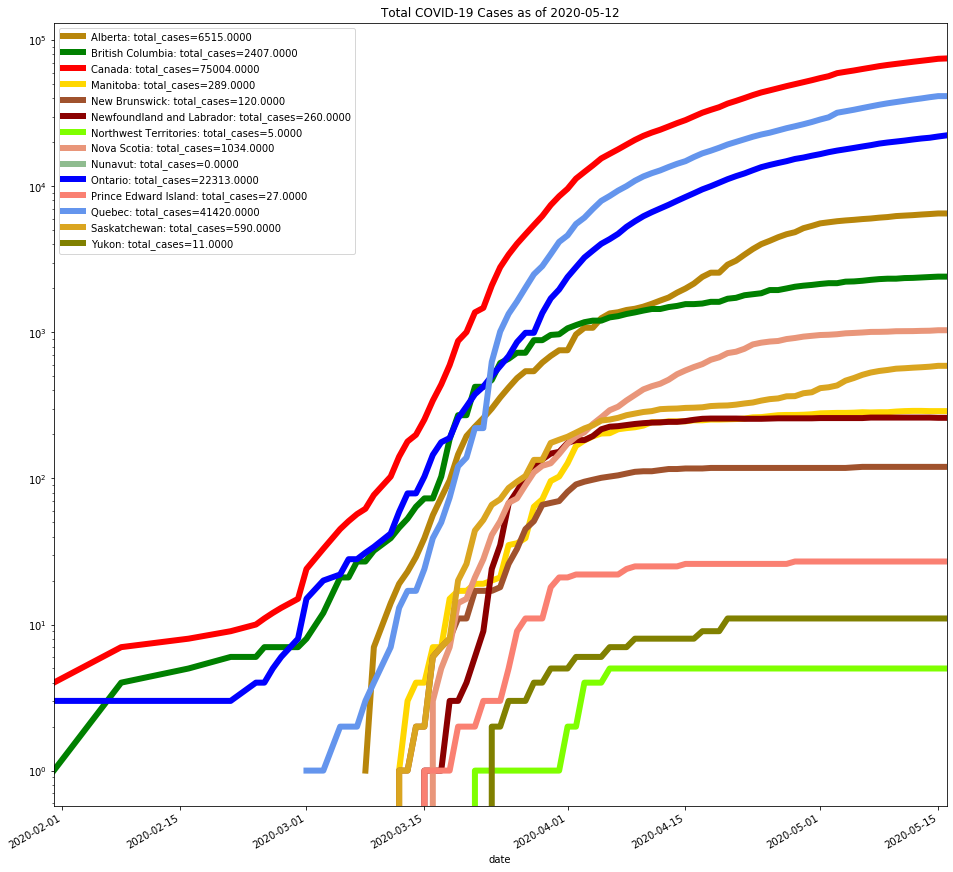

In [3]:
can_tc_fig = can.plot_var("total_cases", *can.provinces,
    figsize=(16,16),
    log_scale=True,
    colours=can.prov_colours,
    #date_start="2020-03-01",
    lw=6,
    title=f"Total COVID-19 Cases as of {as_of}"  
)


plt.show()

In [4]:
var_pivot = can.var_by_location("total_cases", *can.provinces)
var_pivot[-7:][can.provinces]

location,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
date,,,,,,,,,,,,,,
2020-05-10,68848.0,261.0,27.0,1018.0,120.0,37721.0,20238.0,287.0,564.0,6253.0,2330.0,11.0,5.0,0.0
2020-05-11,69981.0,261.0,27.0,1019.0,120.0,38469.0,20546.0,289.0,568.0,6300.0,2353.0,11.0,5.0,0.0
2020-05-12,71157.0,261.0,27.0,1020.0,120.0,39225.0,20907.0,290.0,573.0,6345.0,2360.0,11.0,5.0,0.0
2020-05-13,72278.0,261.0,27.0,1024.0,120.0,39931.0,21236.0,290.0,577.0,6407.0,2376.0,11.0,5.0,0.0
2020-05-14,73401.0,261.0,27.0,1026.0,120.0,40724.0,21494.0,289.0,582.0,6457.0,2392.0,11.0,5.0,0.0
2020-05-15,74613.0,260.0,27.0,1034.0,120.0,41420.0,21922.0,289.0,590.0,6515.0,2407.0,11.0,5.0,0.0
2020-05-16,75004.0,260.0,27.0,1034.0,120.0,41420.0,22313.0,289.0,590.0,6515.0,2407.0,11.0,5.0,0.0


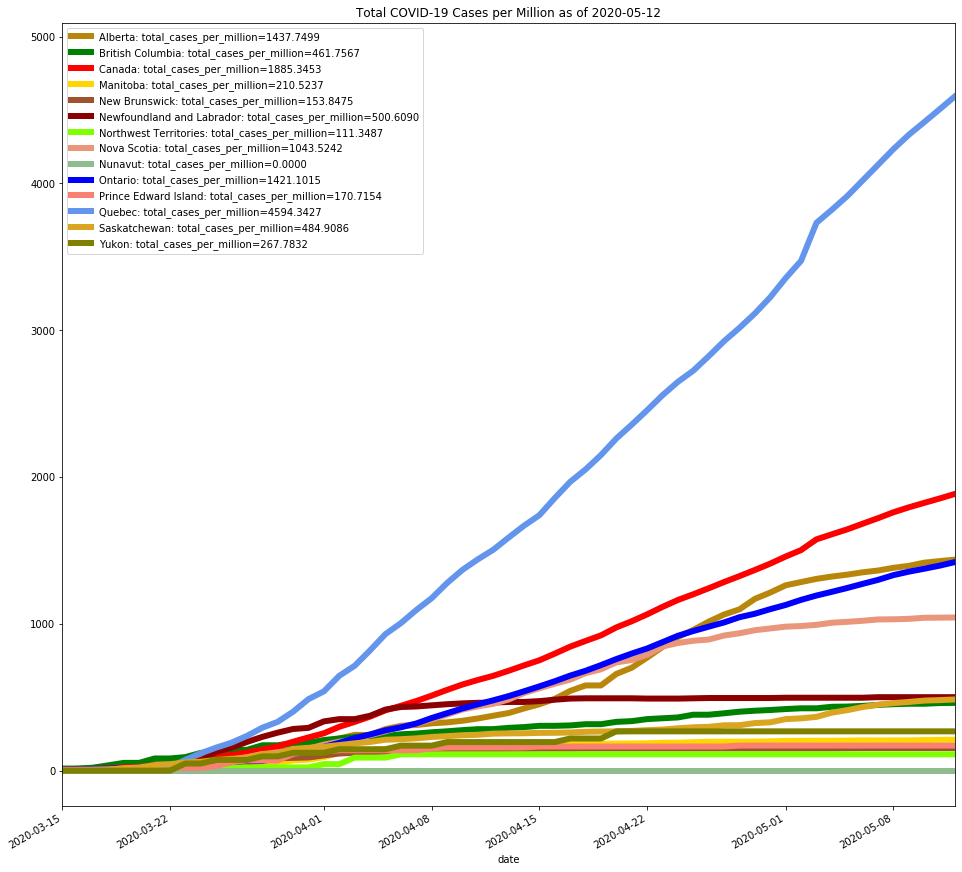

In [5]:
can_tcpm_fig = can.plot_var("total_cases_per_million", *can.provinces,
    figsize=(16,16),
    #log_scale=True,
    colours=can.prov_colours,
    date_start="2020-03-15",
    date_end=as_of,
    lw=6,
    title=f"Total COVID-19 Cases per Million as of {as_of}"  
)


plt.show()

## New cases

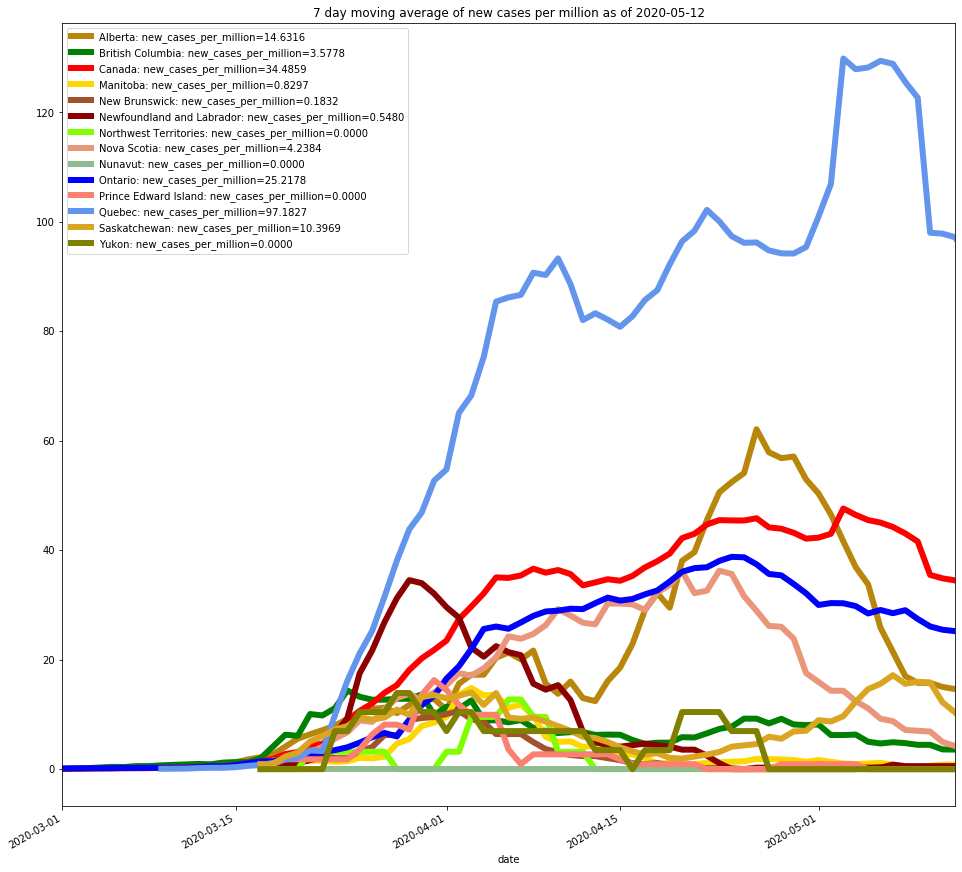

In [6]:
ma_win = 7
can_nc_fig = can.plot_var("new_cases_per_million", *can.provinces, ma_window=ma_win,
    figsize=(16,16),
    #log_scale=True,
    colours=can.prov_colours,
    date_start="2020-03-01",
    date_end=as_of,
    lw=6,
    title=f"{ma_win} day moving average of new cases per million as of {as_of}"  
)


plt.show()

In [7]:
can_nc = can.var_by_location("new_cases", *can.provinces)
can_nc["2020-05-02":"2020-05-09"][can.provinces]

location,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
date,,,,,,,,,,,,,,
2020-05-02,1653.0,0.0,0.0,4.0,0.0,1008.0,511.0,1.0,6.0,97.0,26.0,0.0,0.0,0.0
2020-05-03,2760.0,0.0,0.0,8.0,0.0,2209.0,434.0,1.0,12.0,96.0,0.0,0.0,0.0,0.0
2020-05-04,1298.0,0.0,0.0,14.0,0.0,758.0,370.0,0.0,34.0,70.0,53.0,0.0,0.0,0.0
2020-05-05,1274.0,0.0,0.0,6.0,1.0,794.0,387.0,1.0,20.0,57.0,8.0,0.0,0.0,0.0
2020-05-06,1450.0,0.0,0.0,7.0,1.0,910.0,412.0,2.0,25.0,70.0,23.0,0.0,0.0,0.0
2020-05-07,1426.0,2.0,0.0,9.0,0.0,911.0,399.0,-1.0,19.0,54.0,33.0,0.0,0.0,0.0
2020-05-08,1512.0,0.0,0.0,1.0,0.0,912.0,477.0,1.0,13.0,81.0,27.0,0.0,0.0,0.0
2020-05-09,1268.0,0.0,0.0,3.0,0.0,836.0,346.0,0.0,9.0,59.0,15.0,0.0,0.0,0.0


## Tests

In [8]:
ma_win = 7

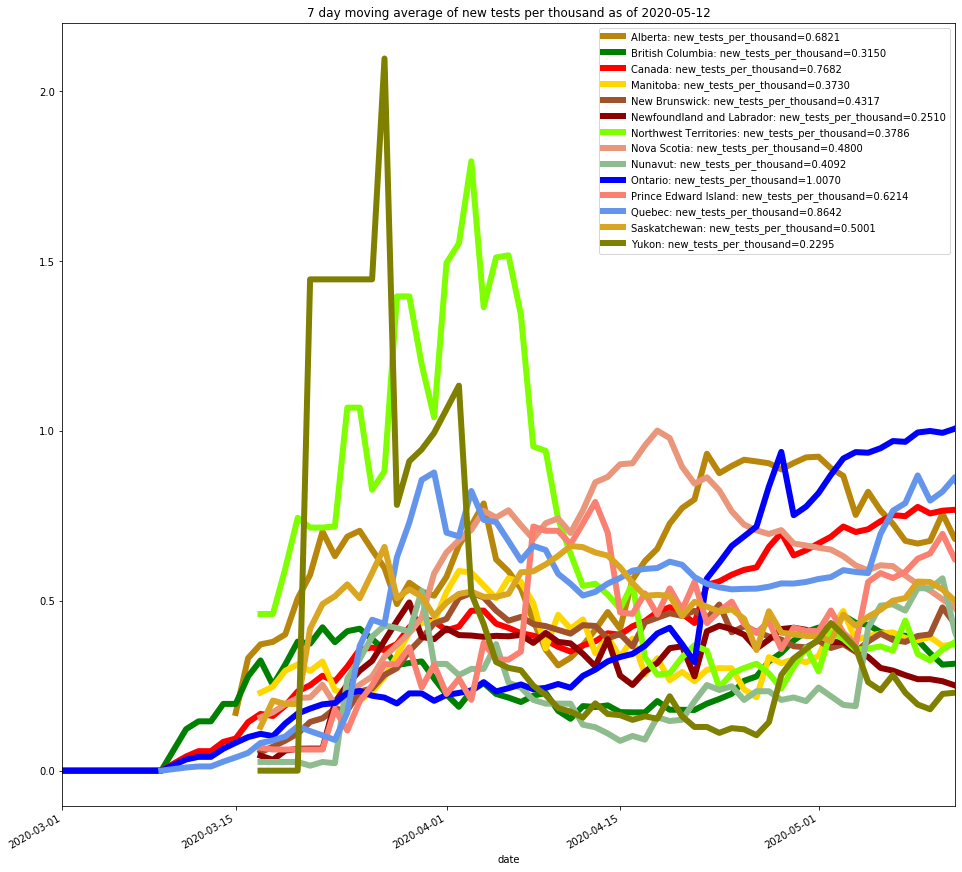

In [9]:

can_nt_fig = can.plot_var("new_tests_per_thousand", *can.provinces, ma_window=ma_win,
    figsize=(16,16),
    #log_scale=True,
    colours=can.prov_colours,
    date_start="2020-03-01",
    date_end=as_of,
    lw=6,
    title=f"{ma_win} day moving average of new tests per thousand as of {as_of}"  
)


plt.show()

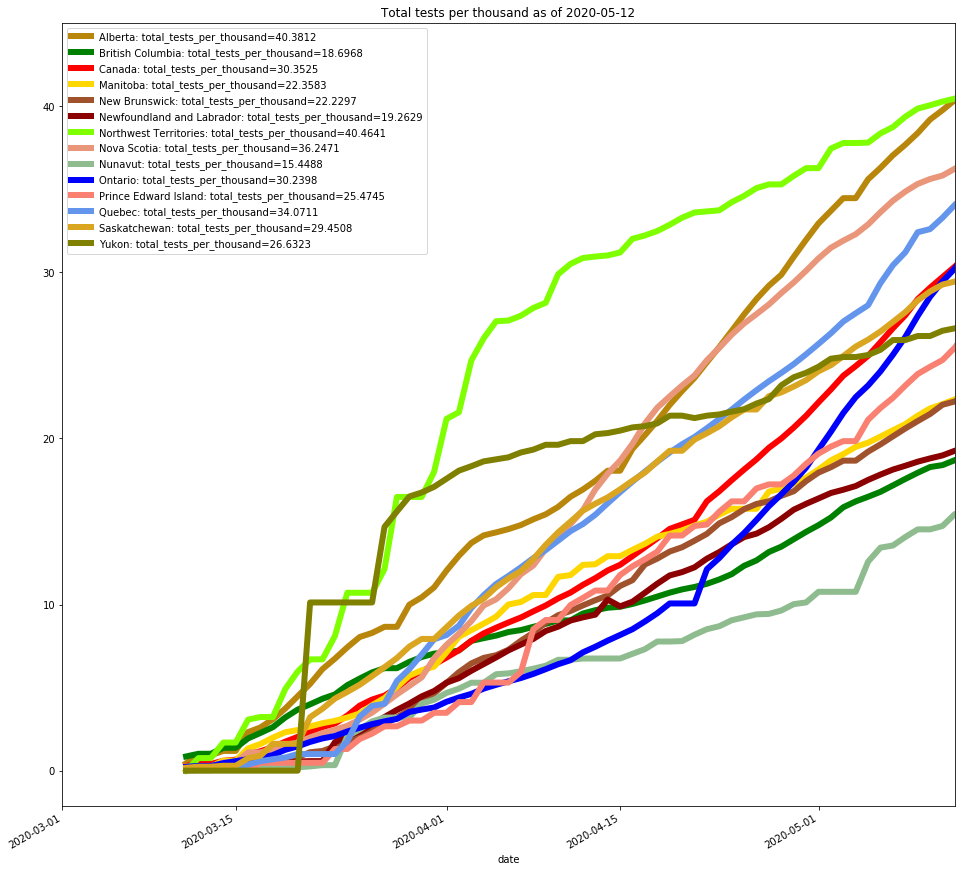

In [10]:
can_tt_fig = can.plot_var("total_tests_per_thousand", *can.provinces,
    figsize=(16,16),
    #log_scale=True,
    colours=can.prov_colours,
    date_start="2020-03-01",
    date_end=as_of,
    lw=6,
    title=f"Total tests per thousand as of {as_of}"  
)


plt.show()

In [11]:
can.df[-13:]

,date,location,total_cases,total_deaths,total_tests,population,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,new_cases,new_cases_per_million,new_deaths,new_deaths_per_million,new_tests,new_tests_per_thousand
1048,2020-05-16,Alberta,6515,125.0,189225.0,4413146.0,1476.271123,28.324465,42.877575,0.0,0.000000,0.0,0.000000,0.0,0.000000
1049,2020-05-16,Saskatchewan,590,6.0,36817.0,1181666.0,499.295063,5.077577,31.156858,0.0,0.000000,0.0,0.000000,731.0,0.618618
1050,2020-05-16,Manitoba,289,7.0,32492.0,1377517.0,209.797774,5.081607,23.587368,0.0,0.000000,0.0,0.000000,0.0,0.000000
1051,2020-05-16,Ontario,22313,1858.0,511323.0,14711827.0,1516.670907,126.292948,34.755914,391.0,26.577257,33.0,2.243093,17187.0,1.168244
1052,2020-05-16,Quebec,41420,3401.0,310868.0,8537674.0,4851.438460,398.352057,36.411322,0.0,0.000000,0.0,0.000000,0.0,0.000000
1053,2020-05-16,Newfoundland and Labrador,260,3.0,10524.0,521365.0,498.690936,5.754126,20.185475,0.0,0.000000,0.0,0.000000,181.0,0.347166
1054,2020-05-16,New Brunswick,120,0.0,18775.0,779993.0,153.847535,0.000000,24.070729,0.0,0.000000,0.0,0.000000,188.0,0.241028
1055,2020-05-16,Nova Scotia,1034,55.0,36916.0,977457.0,1057.847046,56.268460,37.767390,0.0,0.000000,0.0,0.000000,329.0,0.336588
1056,2020-05-16,Prince Edward Island,27,0.0,4469.0,158158.0,170.715361,0.000000,28.256554,0.0,0.000000,0.0,0.000000,0.0,0.000000
1057,2020-05-16,Yukon,11,0.0,1124.0,41078.0,267.783242,0.000000,27.362579,0.0,0.000000,0.0,0.000000,5.0,0.121720


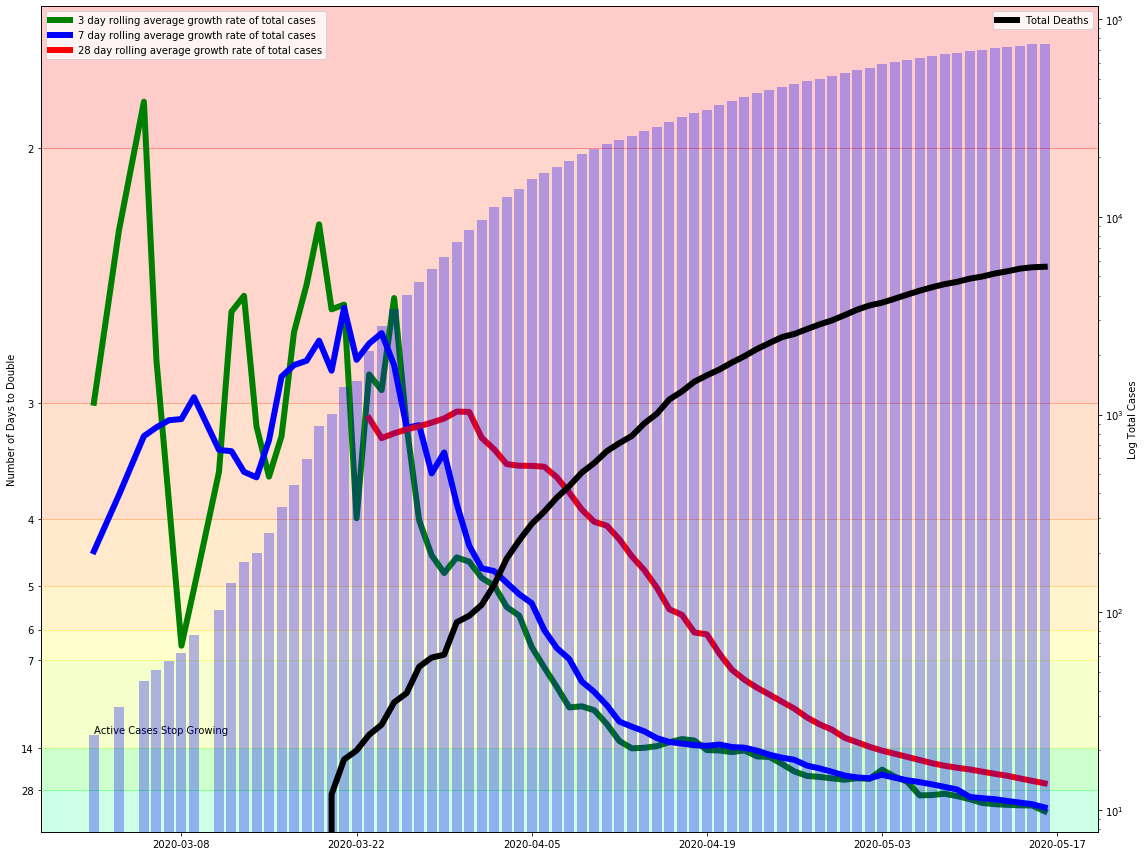

In [12]:
fig = can.plot_location('Canada', from_date="2020-03-01")

plt.show()

# World

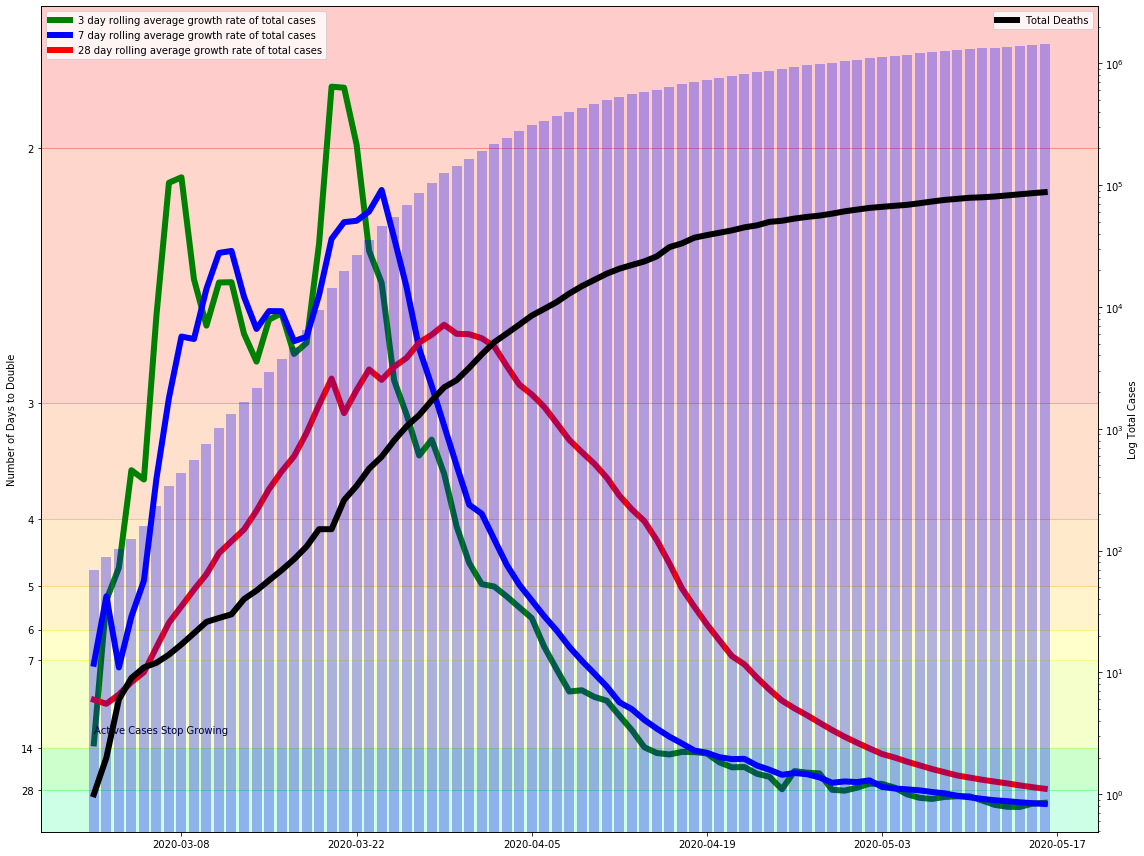

In [13]:
from src.ecdc import ECDC

world = ECDC()
fig = world.plot_location('United States', from_date="2020-03-01")

plt.show()

In [14]:
countries = ['Canada', 
             'China', 
             'United States', 
             'Italy', 
             'Spain', 
             'United Kingdom', 
             'Germany',
             'Russia']

world.cum_pos_test_rate(*countries)[-7:]

location,Canada,China,Germany,Italy,Russia,Spain,United Kingdom,United States
date,,,,,,,,
2020-05-10,0.061929,NaN,0.053758,0.085064,0.036465,0.129834,0.161271,0.146151
2020-05-11,0.061529,NaN,0.053871,0.084043,0.037200,0.127010,0.156547,0.142248
2020-05-12,0.061082,NaN,0.054168,0.082215,0.038127,0.124364,0.152727,0.139675
2020-05-13,0.060850,NaN,0.054421,0.080865,0.038820,0.121814,0.148768,0.137342
2020-05-14,0.061629,NaN,0.054718,0.079111,0.039151,0.119589,0.144115,0.134478
2020-05-15,0.059535,NaN,0.055008,0.077580,0.039328,0.119924,0.140158,0.132263
2020-05-16,0.058951,NaN,0.055205,0.076026,0.039488,NaN,0.135882,0.134643


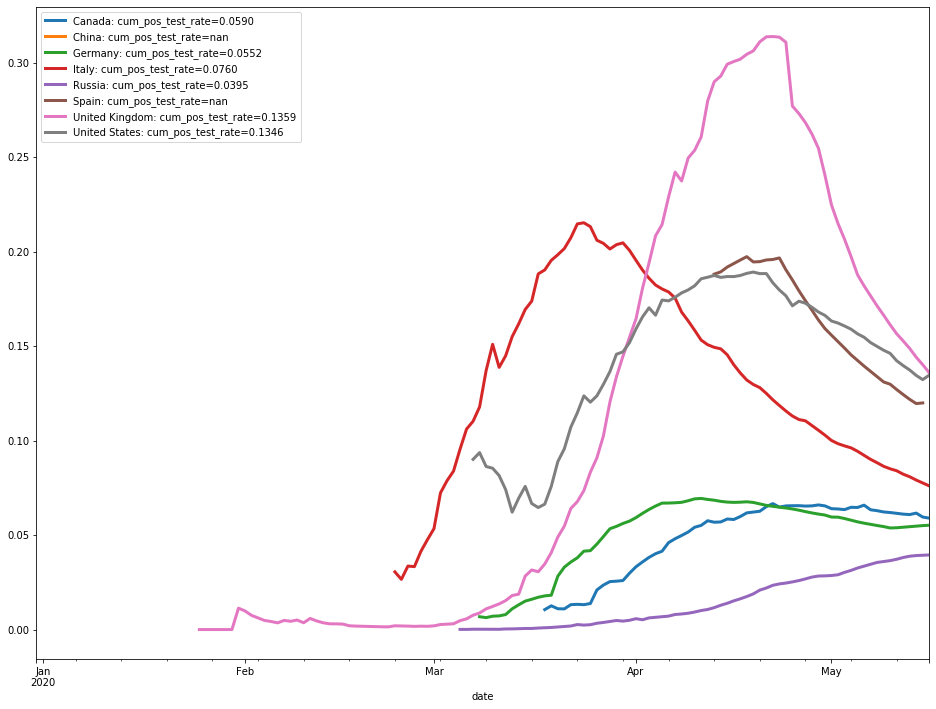

In [15]:
world.plot_var("cum_pos_test_rate", *countries)

plt.show()

In [16]:
world.get_location('China')[['total_tests', 'tests_units', 'total_tests_per_thousand']]

,total_tests,tests_units,total_tests_per_thousand
3072,NaN,NaN,NaN
3073,NaN,NaN,NaN
3074,NaN,NaN,NaN
3075,NaN,NaN,NaN
3076,NaN,NaN,NaN
...,...,...,...
3205,NaN,NaN,NaN
3206,NaN,NaN,NaN
3207,NaN,NaN,NaN
3208,NaN,NaN,NaN


In [17]:
world.df.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cvd_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')

In [21]:
fig = plt.figure(figsize=(16,12))

fig.add_axes()
fig.get_axes()

#ax1 = world.plot_var("total_cases_growth", 'Canada')
#ax2 = world.plot_var("total_cases", 'Canada')

[]

<Figure size 1152x864 with 0 Axes>